# Heathvonn Styles

# Project Deliverable II

## Dataset:

Soccer Player Statistics https://www.kaggle.com/antoinekrajnc/soccer-players-statistics


## Use case:

Soccer Team Recruiter: Use graph data to target best suited players for a club at a specific position in terms of player versatility, work rate and availability


## Benefit:

Team player recruiters can use this data model to gain greater insight into player traits, ratings and 
group classifications. This data graph model will help with player recruiting through visualization of data
statistics relevant to age, contract expiries, player ratings and work rate. Additionally, this graph model 
can be used to display commonality of traits amongst players of various rating groups.

## Data Graph Model Questions:


<ul>
  <li>Which club produces the highest value players?</li>
  <li>Who are the youngest high rating players soon to become free agents and what are their positions/ preferred positions?</li>
  <li>Who is the oldest high rating player for a particular club with a contract that will soon expire?</li>
  <li>Who is the oldest high rating player for a particular position with a contract that will soon expire?</li>  
  <li>What is the work rate classification of a particular player with a soon to expire contract on a given team?</li>
  <li>Which players within the same Rating Group are most similar?</li>  
</ul>

* Rating Group is either High (player ratings >= 85 ), Medium(84 >= player ratings >= 61 ) or Low (player ratings <= 60) *


## Graph Data Model 

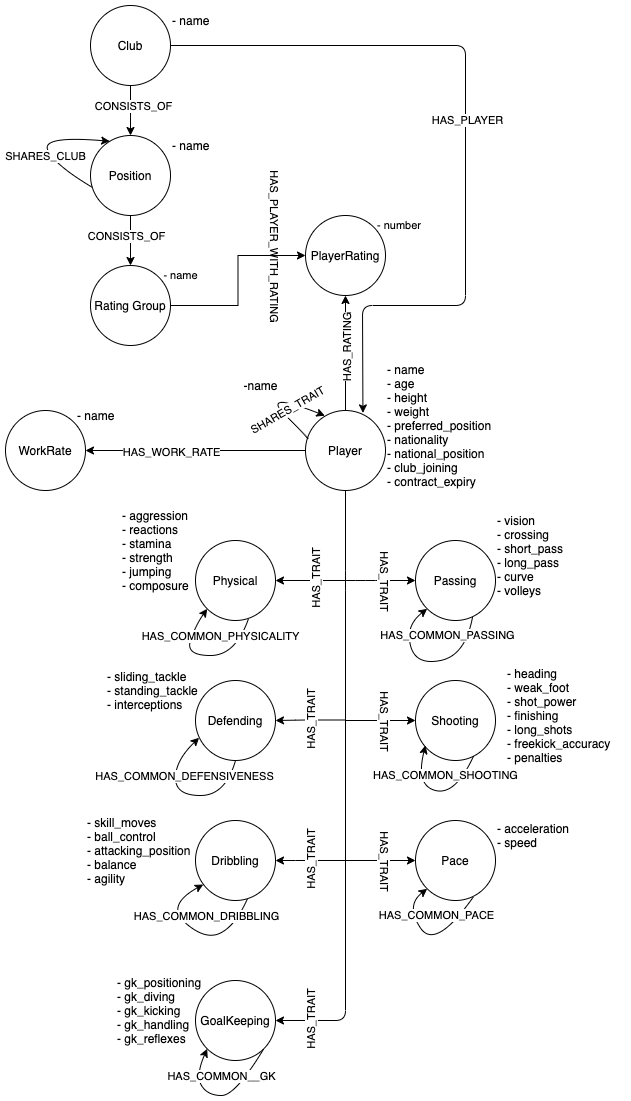

## Updates to Graph Data Model

<ul>
  <li>Removed birth_date and preferred_foot as properties from Player node</li>
  <li>Added number as a property for all of the trait nodes</li>  
  <li>Added relationships to all of the trait nodes</li>   
<ul>    

## Graph Projections

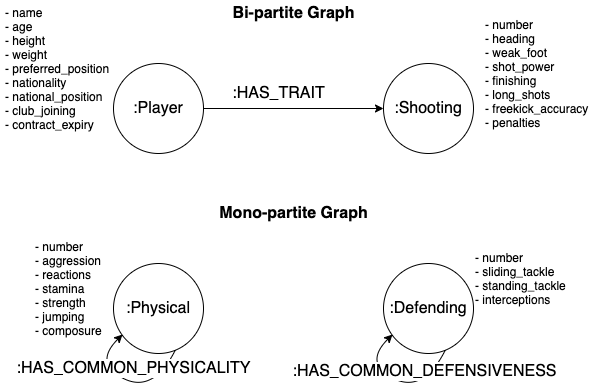

## Populated Neo4J database

<img src="photos/NodeRel.png" style="height:800px;width:500px"/>


<img src="photos/Properties.png" style="height:900px;width:500px"/>

## Cypher Queries

### Query 1 - Find youngest high value player, expected free agent

MATCH (pr:PlayerRating)<-[:HAS_PLAYER_WITH_RATING]-(rg:RatingGroup) where rg.name = 'High'   

MATCH (ply:Player)  where toInteger(ply.rating) = pr.name 

WITH *

WHERE ply.contract_expiry = "2021.0"

WITH *

WHERE toInteger(ply.age) < 25    

Return ply.name,ply.age,ply.rating,ply.contract_expiry, ply.club_position, ply.preffered_position  

### Results


In [2]:
import neo4j
import pandas as pd
df = pd.read_csv('results/results1.csv')
df.rename({'ply.name': 'Name'}, axis=1, inplace=True)
df.rename({'ply.age': 'Age'}, axis=1, inplace=True)
df.rename({'ply.rating': 'Rating'}, axis=1, inplace=True)
df.rename({'ply.contract_expiry': 'Contract Expiry'}, axis=1, inplace=True)
df.head()

,Name,Age,Rating,Contract Expiry,ply.club_position,ply.preffered_position
0,Jan Oblak,24,87,2021.0,GK,GK
1,Paul Pogba,24,88,2021.0,LCM,CM/CAM
2,Marco Verratti,24,86,2021.0,RCM,CM/CDM
3,David Alaba,24,86,2021.0,LB,LB/CM


###  Query 1 Value-Added

This can be valuable to Soccer Team Recruiters in finding the youngest high value players who are soon to 
become free agents for various positions.

### Query 2 - Find Juventus' players position, name, workRate, contract expiry

MATCH (pos:Position)<-[:CONSISTS_OF]-(c:Club) where c.name = "Juventus"

MATCH (ply:Player)<-[:HAS_PLAYER]-(c) 

MATCH (wr:WorkRate)<-[:HAS_WORK_RATE]-(ply)   

MATCH (ply) where ply.club_position = pos.name 

Return pos.name,ply.name,wr.name,toInteger(ply.rating),toInteger(ply.contract_expiry)

### Results

In [11]:
df2 = pd.read_csv('results/results2.csv')
df2.rename({'pos.name': 'Club Position'}, axis=1, inplace=True)
df2.rename({'ply.name': 'Name'}, axis=1, inplace=True)
df2.rename({'wr.name': 'Work Rate'}, axis=1, inplace=True)
df2.rename({'toInteger(ply.rating)': 'Rating'}, axis=1, inplace=True)
df2.rename({'toInteger(ply.contract_expiry)': 'Contract Expiry'}, axis=1, inplace=True)
df2.head(29)

,Club Position,Name,Work Rate,Rating,Contract Expiry
0,Sub,Daniele Rugani,Low / Medium,80,2021
1,Sub,Dani Alves,High / Low,84,2018
2,Sub,Mario Lemina,Medium / Medium,77,2020
3,Sub,Emil Audero,Medium / Medium,67,2018
4,GK,Gianluigi Buffon,Medium / Medium,88,2018
5,Res,Matheus Pereira,High / Medium,70,2017
6,Res,Matheus Pereira,Medium / Medium,70,2017
7,Sub,Kwadwo Asamoah,High / High,80,2017
8,Res,Moise Kean,Medium / Medium,62,2017
9,LM,Mario Mandžukić,High / High,83,2019


### Query 2 Value-Added

This query can be used by a soccer team recruiter to inspect a team's makeup in terms of position composition. Additionally, 
this data helps with management of expected contract expiries. This information can help with making decisions on whether
a specific player should have their contract renewed based on their work rate and player rating.

### Query 3 - Find high value players at a specific position with contract expiring

MATCH (pr:PlayerRating)<-[:HAS_PLAYER_WITH_RATING]-(rg:RatingGroup) WHERE rg.name = 'High'   

MATCH (ply:Player) WHERE toInteger(ply.rating) = pr.name 

WITH *

WHERE ply.contract_expiry = "2021.0"

WITH *

WHERE ply.club_position = "ST"

MATCH (ply)<-[:HAS_PLAYER]-(c:Club)       

RETURN ply.name,ply.age,ply.rating,ply.contract_expiry, ply.club_position, ply.preffered_position,c.name  

### Results 

In [12]:
df3 = pd.read_csv('results/results3.csv')
df3.rename({'ply.name': 'Name'}, axis=1, inplace=True)
df3.rename({'ply.age': 'Age'}, axis=1, inplace=True)
df3.rename({'toInteger(ply.rating)': 'Rating'}, axis=1, inplace=True)
df3.rename({'toInteger(ply.contract_expiry)': 'Contract Expiry'}, axis=1, inplace=True)
df3.rename({'ply.club_position': 'Club Position'}, axis=1, inplace=True)
df3.rename({'ply.preffered_position': 'Preffered Position'}, axis=1, inplace=True)
df3.rename({'c.name': 'Club'}, axis=1, inplace=True)
df3.head(3)

,Name,Age,ply.rating,ply.contract_expiry,Club Position,Preffered Position,Club
0,Robert Lewandowski,28,90,2021.0,ST,ST,FC Bayern
1,Gonzalo Higuaín,29,89,2021.0,ST,ST,Juventus
2,Luis Suárez,30,92,2021.0,ST,ST,FC Barcelona


### Query 3 Value-Added 

The value added here is that a soccer team recruiter can target soon to be free agents based on a specific position. This data also provides insight into which teams the expected free agents are on that will have to be approached.

## Graph Algorithms

### Algorithm 1: PageRank 

#### Node Projection 

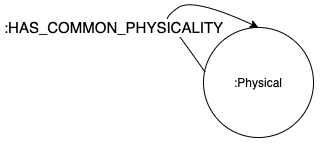

CALL gds.pageRank.stream({
  
  nodeProjection:"Physical", 
  
  relationshipProjection: "HAS_COMMON_PHYSICALITY",
  
  maxIterations: 2,
  
  dampingFactor: 0.85
})

YIELD nodeId, score

RETURN gds.util.asNode(nodeId).number AS Physicality, score

ORDER BY score DESC;

### Results

In [3]:
df4 = pd.read_csv('results/GAresults1.csv')
df4.head(1000)

,Physicality,score
0,66,98.8350
1,63,91.6950
2,67,91.4400
3,59,78.3075
4,55,74.7375
...,...,...
995,54,0.1500
996,56,0.1500
997,43,0.1500
998,48,0.1500


### Value-Added

The data provided from running the pageRank algorithm on the node projection specified above is important 
because it gives insight into how common or not a particular physicality rating is between all of the players 
in the "High" RatingGroup. From the data provided above it can be concluded that the most common physicality rating shared by players in the "High" RatingGroup is 66 as it recieved the highest score ranking of "98.8350". 


### Algorithm 2 - Node Similarity

#### Node Projection

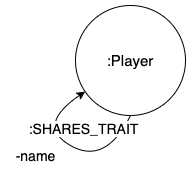

CALL gds.nodeSimilarity.stream({
  
  nodeProjection: ['Player'],
  
  relationshipProjection: {
    
    MY_RELATIONSHIP_TYPE_NATURAL: {
      
      type: 'SHARES_TRAIT',
      
      orientation: 'NATURAL'
    }
  }
})


YIELD node1, node2, similarity

RETURN gds.util.asNode(node1).name, gds.util.asNode(node2).name, similarity

### Results 

In [14]:
df5 = pd.read_csv('results/ga2.csv')
df5.rename({'gds.util.asNode(node1).name': 'player 1'}, axis=1, inplace=True)
df5.rename({'gds.util.asNode(node2).name': 'player 2'}, axis=1, inplace=True)
df5.head(200)

,player 1,player 2,similarity
0,Cristiano Ronaldo,Yann Songo'o,0.333333
1,Cristiano Ronaldo,Stefano Negro,0.333333
2,Cristiano Ronaldo,Anton Rodgers,0.333333
3,Cristiano Ronaldo,Cristian Herrera,0.333333
4,Cristiano Ronaldo,Elsad Zverotić,0.300000
...,...,...,...
195,Antoine Griezmann,Adil Rami,0.600000
196,Antoine Griezmann,Andreas Samaris,0.500000
197,Antoine Griezmann,David Meyler,0.500000
198,Antoine Griezmann,Joe Ledley,0.500000


### Value-Added 

The Node Similarity graph algorithm brings value to the specified node projection by 
showing similarities between players. This similarity score is based upon player1 and 
player2 sharing traits with the same players. The higher the similarity score is the more players that player1 and player2 have in common with respect to the ":SHARED_TRAIT" connections they have.

A soccer team recruiter may use this data to suggest possible substitutes for players on various
teams using the commonality of traits between players.

### Algorithm 3 - Degree Centrality 

#### Node Projection 

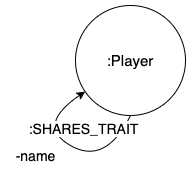

CALL gds.degree.stream({
  
  nodeProjection: 'Player',
  
  relationshipProjection: 'SHARES_TRAIT'
})

YIELD nodeId, score

RETURN gds.util.asNode(nodeId).name AS Name, score AS Shared_With

ORDER BY Shared_With DESC

### Results

In [9]:
df6 = pd.read_csv('results/ga3.csv')
df6.drop_duplicates(subset ="Name", keep = 'first', inplace = True)
df6.head(200)

,Name,Shared_With
0,Marcelo,258.0
3,Felipe,234.0
9,Danilo,210.0
14,Gabriel,150.0
19,Ben Davies,108.0
...,...,...
379,Ahmet Çalık,18.0
380,Anouar Kali,18.0
381,Castro,18.0
382,Isaac Cofie,18.0


### Value-Added 

The degree centrality algorithm brings value to this data by displaying the amount of relationships 
a player has in terms of who all they share traits with. This data can point out which players have unique traits,
as well as which players have a combination of traits shared by many other players within the league.